In [78]:
from gurobipy import *
import numpy as np


##### Q 2 a
The process will be copied across all other problems in Q1.
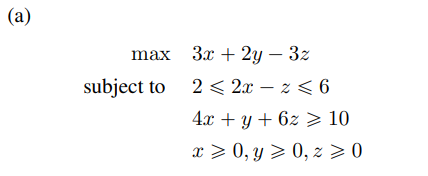

In [13]:
#creat model
m = Model()
coeff = [ -3, -2, 3]
cons= np.array([[2, 0,-1],[2,0,-1], [4, 1, 6]])
x = m.addVars(3, name = "x", lb = 0)
m.setObjective(sum(x[i]*coeff[i] for i in range(len(coeff))))
m.addConstr( sum(cons[0,:][i]*x[i] for i in range(len(coeff)))<= 6)
m.addConstr( sum(cons[1,:][i]*x[i] for i in range(len(coeff))) >= 2)
m.addConstr( sum(cons[2,:][i]*x[i] for i in range(len(coeff))) >=10)

m.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: AMD Athlon Gold 3150U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 3 rows, 3 columns and 7 nonzeros
Model fingerprint: 0x8a5a48eb
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 1e+01]
Presolve time: 0.01s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Infeasible or unbounded model


### Q 2 b
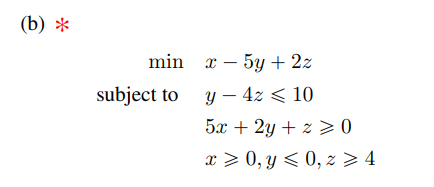


I have changed the variables so that $x,\hat{y},\hat{z} \geq 0$ using $-\hat{y} = y$ and $\hat{z} + 4 = z$ This gives new constraints and objective function.

\begin{align*}
&\text{Objective}  &8 + \text{min } x+5\hat{y} +2\hat{z} \\
&\text{Subject To} & -\hat{y} -4\hat{z} \leq 26 \\
&   &5x -2\hat{y} + \hat{z} \geq -4 \\
&   & x,\hat{y}, \hat{z} \geq 0

\end{align*}


In [24]:
#creat model
m = Model()
coeff2 = [ 1, 5, 2]
cons2= np.array([[0, -1,-4],[5,-2,1]])
x = m.addVars(3, name = "x", lb = 0)
m.setObjective(sum(x[i]*coeff2[i] for i in range(len(coeff2))))
m.addConstr( sum(cons2[0,:][i]*x[i] for i in range(len(coeff2)))<= 26)
m.addConstr( sum(cons2[1,:][i]*x[i] for i in range(len(coeff2)))>= -4)

m.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: AMD Athlon Gold 3150U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x17cf3c26
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 3e+01]
Presolve removed 2 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  0.000000000e+00


In [27]:
#looking at our soluton
print("Objective = {}, x = {}, y = {}, z = {}".format(8 + m.objVal, x[0].x, -1*x[1].x, x[2].x +4 ))

Objective = 8.0, x = 0.0, y = -0.0, z = 4.0


### Q 2 c
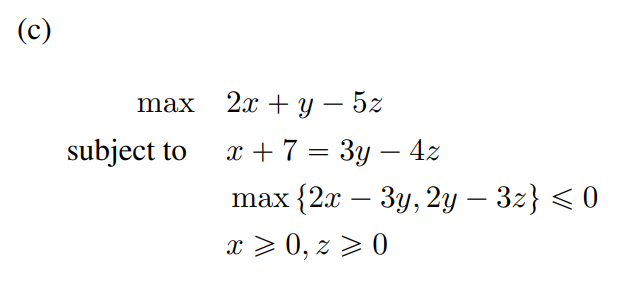

There is a missing contraint on $y$ hence it will need to be eliminated. Using $y = \frac{x+4z+z}{3}$ We have the following LP.
\begin{align*}
&\text{Objective}   &-\frac{7}{3} + \text{min } \frac{-7}{3}x + \frac{11}{3}z \\
&\text{Subject To}  & x -4z \leq 7 \\
&                   &\frac{2}{3}x - \frac{1}{3}z \leq \frac{14}{3} \\
&                   & x, z \geq 0
\end{align*}

In [31]:
#creat model
m = Model()
coeff3 = [-7/3, 11/3 ]
cons3= np.array([[1, -4],[2/3,-1/3]])
x = m.addVars(3, name = "x", lb = 0)
m.setObjective(sum(x[i]*coeff3[i] for i in range(len(coeff3))))
m.addConstr( sum(cons3[0,:][i]*x[i] for i in range(len(coeff3)))<= 7)
m.addConstr( sum(cons3[1,:][i]*x[i] for i in range(len(coeff3)))<= -14/3)

m.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: AMD Athlon Gold 3150U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 2 rows, 3 columns and 4 nonzeros
Model fingerprint: 0xa42cb65c
Coefficient statistics:
  Matrix range     [3e-01, 4e+00]
  Objective range  [2e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 7e+00]
Presolve removed 0 rows and 1 columns
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.3333333e+30   7.916667e+29   2.333333e+00      0s
       2    5.1333333e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.03 seconds (0.00 work units)
Optimal objective  5.133333333e+01


In [38]:
#looking at our soluton
print("Objective = {:.2f}, x = {:.2f}, y = {:.2f}, z = {:.2f}".format(-1*(-7/3 + m.objVal), x[0].x,(x[0].x + 4*x[1].x + 7)/3, x[1].x, ))

Objective = -49.00, x = 0.00, y = 21.00, z = 14.00


### Q 3 
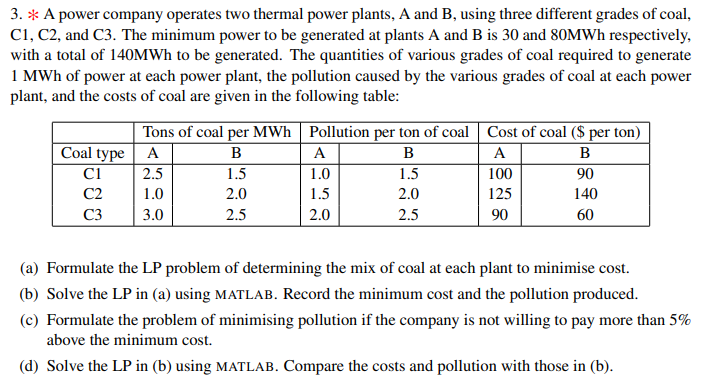

b)

In [108]:
#creat model
m = Model()
c_type = [0,1,2]
plants = [0,1]
I = range(len(c_type))
J = range(len(plants))
pollution = np.array([[1, 1.5, 2], [1.5, 2.0, 2.5]]).T
tons = np.array([[2.5, 1, 3], [1.5, 2.0, 2.5]]).T
cost = np.array([[100, 125, 90], [90, 140, 60]]).T

x = m.addVars(3, 2, name = "x", lb = 0)
m.setObjective(sum(cost[i,j] * x[i,j] for j in J for i in I))
m.addConstr( sum( x[i,0]/tons[i,0] for i in I) >= 30)
m.addConstr( sum( x[i,1]/tons[i,1] for i in I) >= 80)
m.addConstr( sum( x[i,j]/tons[i,j] for i in I for j in J) == 140)

m.optimize()


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: AMD Athlon Gold 3150U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 3 rows, 6 columns and 12 nonzeros
Model fingerprint: 0xf77d859c
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [6e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 1e+02]
Presolve removed 3 rows and 6 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.8300000e+04   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.830000000e+04


In [107]:
x_arr = np.array([ x[i,j].x for i in I for j in J]).reshape(3,2)
sum(x_arr/tons)

array([60., 80.])

In [109]:
print("Objective = {:.2f}".format(m.objVal))
mincost = m.objVal
print("A {:.2f} tons C1  {:.2f} tons C2  {:.2f} tons C3".format( x[0,0].x, x[1,0].x, x[2,0].x))
print("B {:.2f} tons C1  {:.2f} tons C2  {:.2f} tons C3".format(x[0,1].x, x[1,1].x, x[2,1].x))
print("Pollution: {}".format(sum( x[i,j].x*pollution[i,j] for i in I for j in J)))

Objective = 18300.00
A 0.00 tons C1  60.00 tons C2  0.00 tons C3
B 120.00 tons C1  0.00 tons C2  0.00 tons C3
Pollution: 270.0


c)

In [112]:
#creat model
m2 = Model('RAP')
c_type = [0,1,2]
plants = [0,1]
I = range(len(c_type))
J = range(len(plants))
pollution = np.array([[1, 1.5, 2], [1.5, 2.0, 2.5]]).T
tons = np.array([[2.5, 1, 3], [1.5, 2.0, 2.5]]).T
cost = np.array([[100, 125, 90], [90, 140, 60]]).T

x = m2.addVars(3, 2, name = "x", lb = 0)
m2.setObjective((sum(pollution[i,j] * x[i,j] for j in J for i in I)))
m2.addConstr( sum( x[i,0]/tons[i,0] for i in I) >= 30)
m2.addConstr( sum( x[i,1]/tons[i,1] for i in I) >= 80)
m2.addConstr( sum( x[i,j]/tons[i,j] for i in I for j in J) == 140)
m2.addConstr( sum(cost[i,j] * x[i,j] for j in J for i in I) <= mincost*1.05)
m2.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: AMD Athlon Gold 3150U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 4 rows, 6 columns and 18 nonzeros
Model fingerprint: 0xebb8a365
Coefficient statistics:
  Matrix range     [3e-01, 1e+02]
  Objective range  [1e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 2e+04]
Presolve time: 0.01s
Presolved: 4 rows, 6 columns, 18 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1000000e+02   1.280000e+03   0.000000e+00      0s
       1    2.7000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.700000000e+02


In [113]:
print("Objective = {:.2f}".format(m2.objVal))
print("A {:.2f} tons C1  {:.2f} tons C2  {:.2f} tons C3".format( x[0,0].x, x[1,0].x, x[2,0].x))
print("B {:.2f} tons C1  {:.2f} tons C2  {:.2f} tons C3".format(x[0,1].x, x[1,1].x, x[2,1].x))
print("Cost: {}".format(sum( x[i,j].x*cost[i,j] for i in I for j in J)))

Objective = 270.00
A 0.00 tons C1  60.00 tons C2  0.00 tons C3
B 120.00 tons C1  0.00 tons C2  0.00 tons C3
Cost: 18300.0
